p.159

In [1]:
import pylab

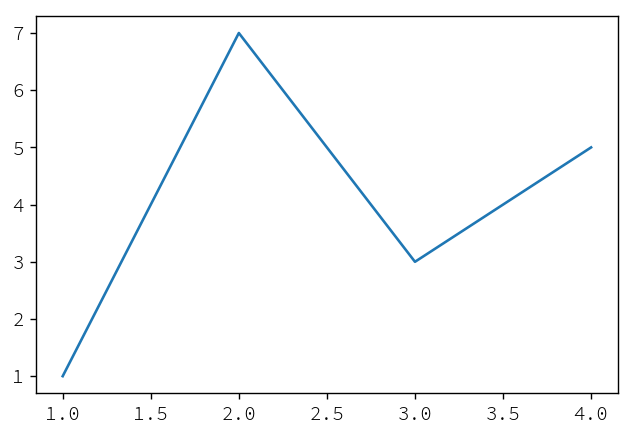

In [2]:
pylab.figure(1, dpi=125) # figure 1を作成
pylab.plot([1, 2, 3, 4], [1, 7, 3, 5]) # figure 1に作図
pylab.show() # 図を画面に表示

p.160

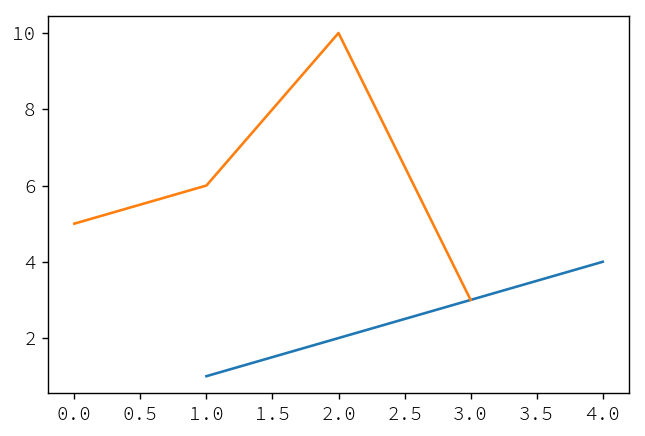

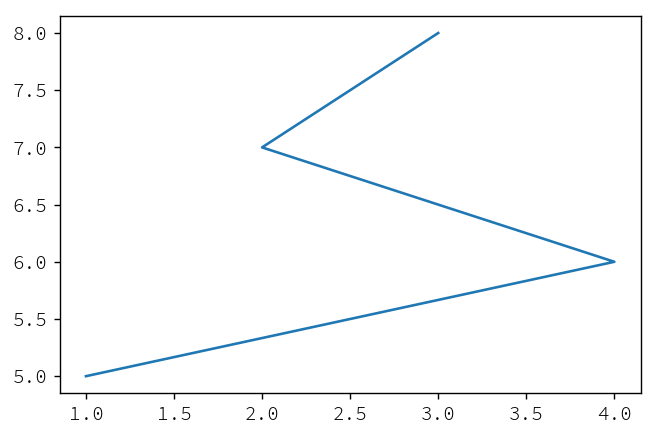

In [3]:
pylab.figure(1, dpi=125) # figure 1を作成
pylab.plot([1, 2, 3, 4], [1, 2, 3, 4]) # figure 1に描画
pylab.figure(2, dpi=125) # figure 2を作成
pylab.plot([1, 4, 2, 3], [5, 6, 7, 8]) # figure 2に描画
pylab.savefig('Figure-Addie') # figure 2を保存
pylab.figure(1) # figure 1に戻る
pylab.plot([5, 6, 10, 3]) # figure 1に再度描画
pylab.savefig('Figure-Jane') # figure 2を保存

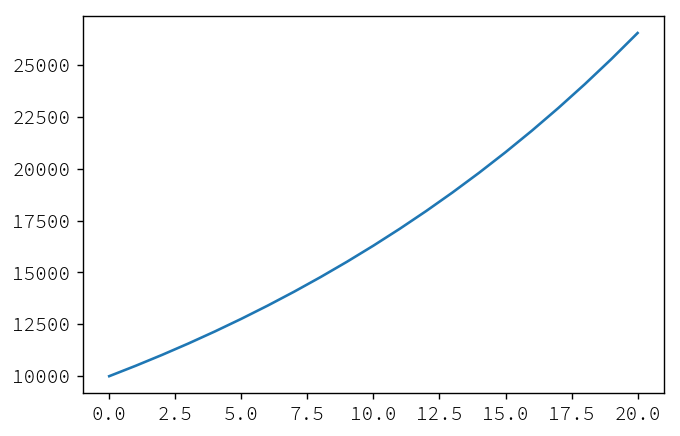

In [4]:
pylab.figure(dpi=125)
principal = 10000 # 初期投資額
ineterestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * ineterestRate
pylab.plot(values)

Text(0,0.5,u'\u5143\u5229\u5408\u8a08 ($)')

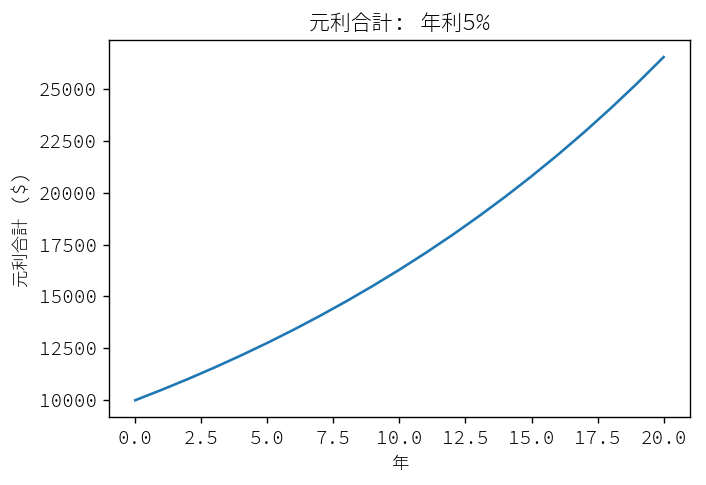

In [5]:
pylab.figure(dpi=125)
principal = 10000 # 初期投資額
ineterestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * ineterestRate
pylab.plot(values)
pylab.title(u'元利合計: 年利5%')
pylab.xlabel(u'年')
pylab.ylabel(u'元利合計 ($)')

Text(0,0.5,u'\u5143\u5229\u5408\u8a08 ($)')

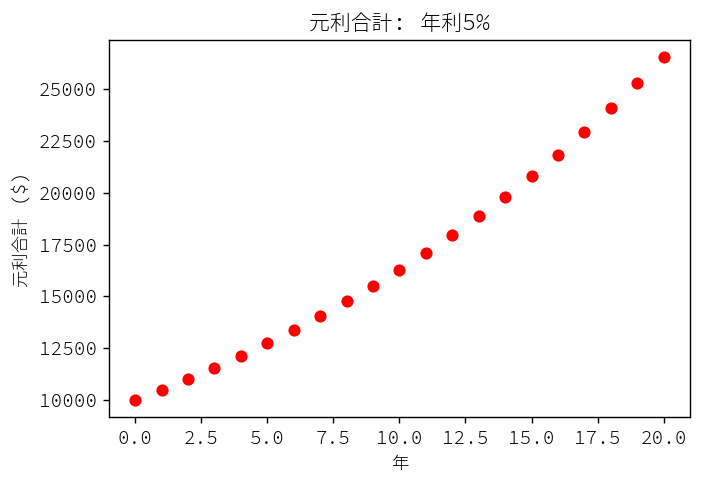

In [6]:
pylab.figure(dpi=125)
principal = 10000 # 初期投資額
ineterestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * ineterestRate
pylab.plot(values, 'ro')
pylab.title(u'元利合計: 年利5%')
pylab.xlabel(u'年')
pylab.ylabel(u'元利合計 ($)')

Text(0,0.5,u'\u5143\u5229\u5408\u8a08 ($)')

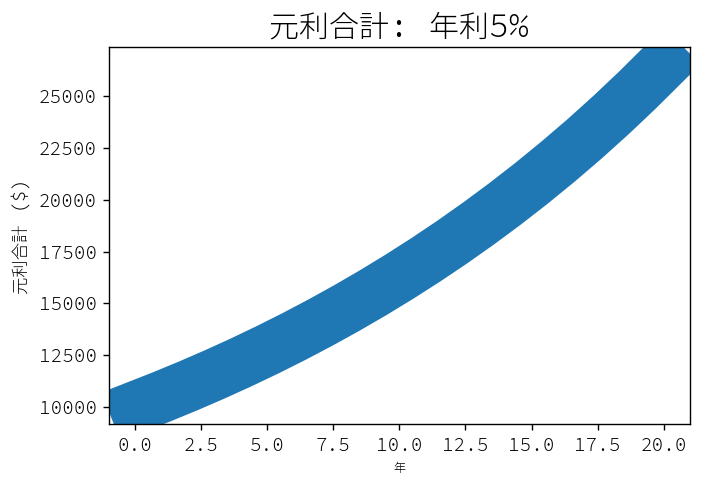

In [7]:
pylab.figure(dpi=125)
principal = 10000 # 初期投資額
ineterestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal * ineterestRate
pylab.plot(values, linewidth = 30)
pylab.title(u'元利合計: 年利5%', fontsize = 'xx-large')
pylab.xlabel(u'年', fontsize = 'x-small')
pylab.ylabel(u'元利合計 ($)')

In [8]:
# 線の太さの設定
pylab.rcParams['lines.linewidth'] = 4
# 題名に使われる文字の大きさの設定
pylab.rcParams['axes.titlesize'] = 20
# 軸の名前に使われる文字の大きさの設定
pylab.rcParams['axes.labelsize'] = 20
# x 軸の数字の大きさの設定
pylab.rcParams['xtick.labelsize'] = 16
# y 軸の数字の大きさの設定
pylab.rcParams['ytick.labelsize'] = 16
# x 軸の目盛り幅の設定
pylab.rcParams['xtick.major.size'] = 7
# y 軸の目盛り幅の設定
pylab.rcParams['ytick.major.size'] = 7
# マーカーの大きさの設定
pylab.rcParams['lines.markersize'] = 10

In [9]:
def findPayment(loan, r, m):
    """loanとrをfloat、mをintとする
       月割りの金利をrとし、借入額loanの住宅ローンをmヶ月で返済する場合の
       毎月の返済額を返す"""
    return loan * ((r * (1 + r) ** m) / ((1 + r) ** m - 1))

In [10]:
class Mortgage(object):
    """異なる住宅ローンを扱うための抽象クラス"""

    def __init__(self, loan, annRate, months):
        """新たな住宅ローンを生成する"""
        self.loan = loan # 借入額
        self.rate = annRate / 12.0 # 年利から月割の利息を求める
        self.months = months # 返済期間(月)
        self.paid = [0.0] # 月毎の返済額
        self.owed = [loan] # 月毎の借入残高
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None # 住宅ローンの種類(サブクラスで用いる)

    def makePayment(self):
        """返済を行う"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1] * self.rate
        self.owed.append(self.owed[-1] - reduction)

    def getTotalPaid(self):
        """これまでの支払総額を返す"""
        return sum(self.paid)

    def __str__(self):
        """住宅ローンの種類を返す"""
        return self.legend

    def plotPayments(self, style):
        """住宅ローンの返済額を時系列的にプロットする"""
        pylab.plot(self.paid[1:], style, label = self.legend)

    def plotBalance(self, style):
        """住宅ローンの借入残高を時系列的にプロットする"""
        pylab.plot(self.owed, style, label = self.legend)

    def plotTotPd(self, style):
        """住宅ローンの返済累積額を時系列的にプロットする"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)

    def plotNet(self, style):
        """住宅ローンの総費用の近似値を時系列的にプロットする
           具体的には、返済累積額からローンの返済によって得た
           純資産額を減じたものをプロットする"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd .append(totPd[-1] + self.paid[i])
        # 支払いによって得る純資産額とは、返済累積額から借入残高を減じたもの
        equityAcquired = pylab.array([self.loan] * len(self.owed))
        equityAcquired = equityAcquired - pylab.array(self.owed)
        net = pylab.array(totPd) - equityAcquired
        pylab.plot(net, style, label = self.legend)

In [11]:
a1 = pylab.array([1, 2, 4])
print 'a1 =', a1
a2 = a1 * 2
print 'a2 =', a2
print 'a1 + 3 =', a1 + 3
print '3 - a1 =', 3 - a1
print 'a1 - a2 =', a1 - a2
print 'a1 * a2 =', a1 * a2

a1 = [1 2 4]
a2 = [2 4 8]
a1 + 3 = [4 5 7]
3 - a1 = [ 2  1 -1]
a1 - a2 = [-1 -2 -4]
a1 * a2 = [ 2  8 32]


In [12]:
class Fixed(Mortgage):
    """固定金利の住宅ローンクラス"""
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = u'固定金利: ' + str(r * 100) + '%'

In [13]:
class FixedWithPts(Mortgage):
    """頭金付き固定金利の住宅ローンクラス"""
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan * (pts / 100.0)]
        self.legend = u'固定金利: ' + str(r * 100) + u'%、頭金' + str(pts) + '%'

In [14]:
class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r / 12.0
        self.legend = u'変動金利: ' + str(self.teaserMonths) + u'ヶ月まで' \
            + str(teaserRate * 100) + u'%、それ以降' + str(r * 100) + '%'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate,
                self.months - self.teaserMonths)
        Mortgage.makePayment(self)

In [15]:
def plotMortgages(morts, amt):
    styles = ['b-', 'b-.', 'b:']
    # 図を指定する際、番号の代わりに名前を用いる
    payments = 0
    cost = 1
    balance = 2
    netCost = 3

    pylab.figure(payments, dpi=125)
    pylab.title(u'月毎の返済額: 借入金' + str(amt) + '$')
    pylab.xlabel(u'月数')
    pylab.ylabel(u'月毎の返済額 ($)')

    pylab.figure(cost, dpi=125)
    pylab.title(u'返済累積額: 借入金' + str(amt) + '$')
    pylab.xlabel(u'月数')
    pylab.ylabel(u'返済累積額 ($)')

    pylab.figure(balance, dpi=125)
    pylab.title(u'借入残高: 借入金' + str(amt) + '$')
    pylab.xlabel(u'月数')
    pylab.ylabel(u'借入残高 ($)')

    pylab.figure(netCost, dpi=125)
    pylab.title(u'総経費: 借入金' + str(amt) + '$')
    pylab.xlabel(u'月数')
    pylab.ylabel(u'返済累積額 - 純資産額 ($)')

    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
        pylab.figure(balance)
        morts[i].plotBalance(styles[i])
        pylab.figure(netCost)
        morts[i].plotNet(styles[i])

    pylab.figure(payments)
    pylab.legend(loc = 'upper center')

    pylab.figure(cost)
    pylab.legend(loc = 'best')

    pylab.figure(balance)
    pylab.legend(loc = 'best')

In [16]:
def compareMortgages(amt, years, fixedRate, pts, ptsRate,
    varRate1, varRate2, varMonths):

    totMonths = years * 12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

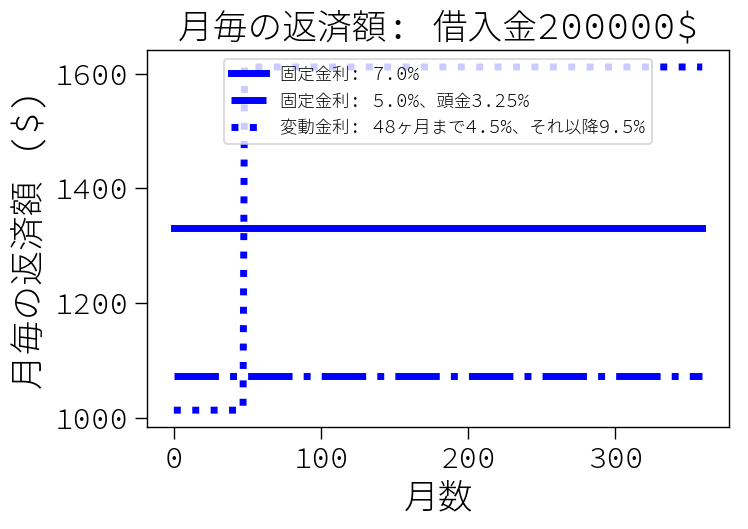

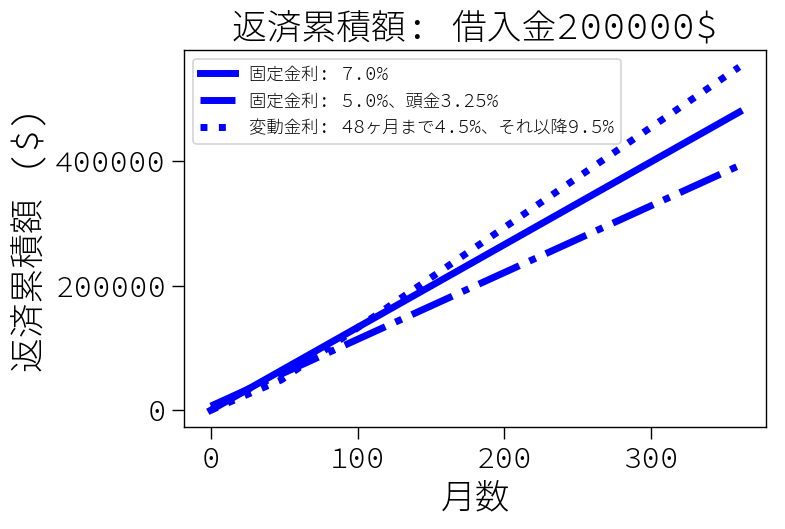

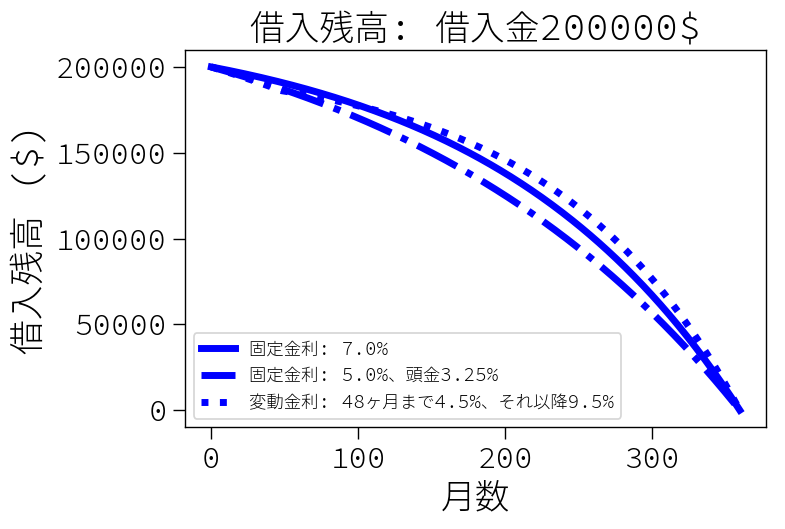

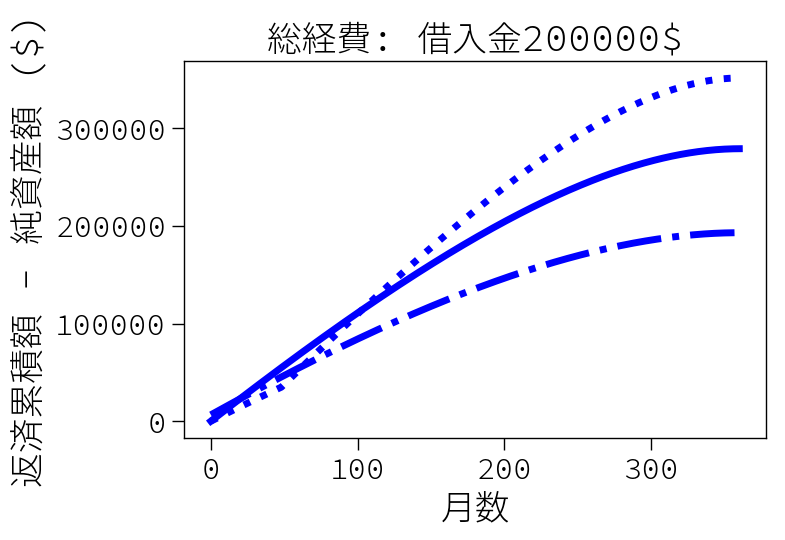

In [17]:
compareMortgages(amt = 200000, years = 30, fixedRate = 0.07,
    pts = 3.25, ptsRate = 0.05,
    varRate1 = 0.045, varRate2 = 0.095, varMonths = 48)